# Ford circles and Farey diagrams

this notebook contains code for use in a series of articles
I am writing about number theory and $\lambda$-lengths of arcs.

- [Ford circles](https://en.wikipedia.org/wiki/Ford_circle)
- [Farey diagram](https://en.wikipedia.org/wiki/Farey_sequence)

* Previously I was relying on screen captures from web pages.
* I should have written this code years ago but I always seemed to be busy
* It is covered by the CC license (see the [README](https://github.com/macbuse/FAREY_DIAGRAM/blob/main/README.md))


In [67]:
import numpy as np
import matplotlib.pyplot as plt

---

## Standard Ford circles with curvatures in $\mathbb{H}$

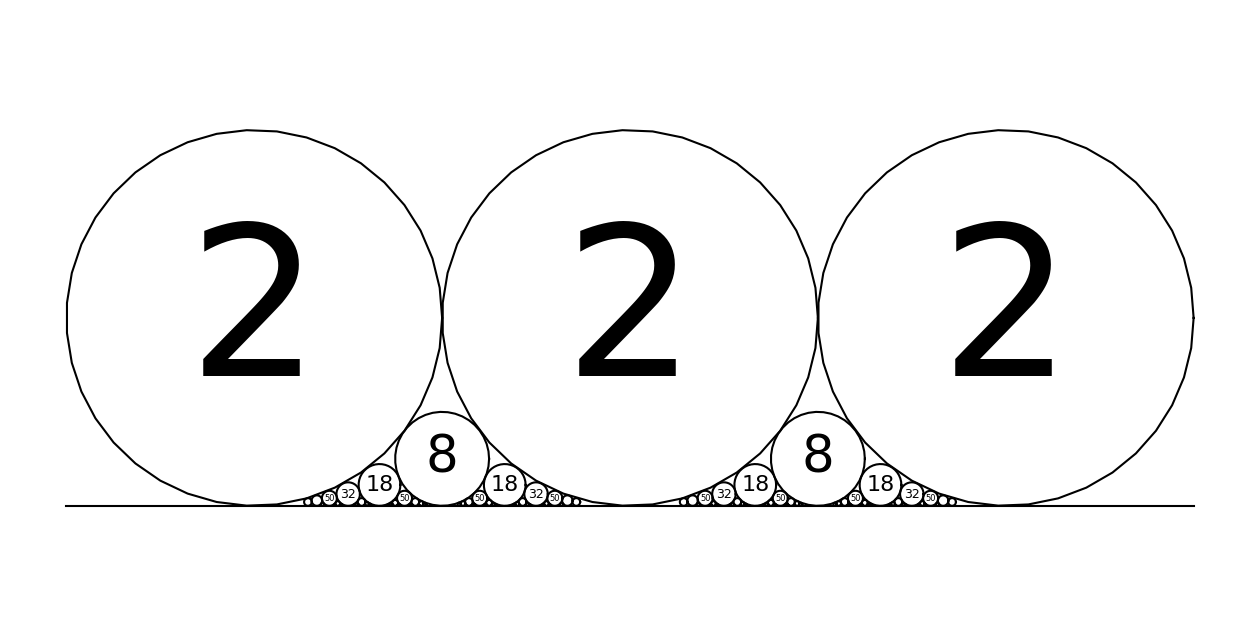

In [107]:
def Farey(n):
    F_n = np.array([[0,1], [1,1]])
    for k in range(n):
        tmp = np.zeros((2*F_n.shape[0]-1, 2))
        # copy F_n in 
        tmp[::2,] = F_n
        # add medians in
        tmp[1::2,] = F_n[:-1] + F_n[1:]
        F_n = tmp
    return F_n


fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.axis('equal')
ax.axis('off')

T = np.linspace(0,2*np.pi, 40)
circle = np.exp(1J*T)/2

for q in QQ:
    numerator, denominator = q
    
    r = 1/denominator**2
    center = numerator/denominator + .5*r*1J
    ford_circle  = r*circle + center
    
    plt.plot(ford_circle.real , 
             ford_circle.imag ,'k');

    # add a label for the curvature
    if denominator < 6:
        ax.annotate(
            str(2*denominator**2), #label text
            xy=(center.real, center.imag), 
            xytext=(0,0),
            textcoords='offset points', 
            ha='center', va='center',
            fontsize=int(150/denominator**2)
        )
    
plt.plot([-1.5,1.5],[0,0],'k');
plt.savefig('ford_circles.png')
plt.savefig('ford_circles.svg')

---

# Standard Farey  diagram in $\mathbb{D}$

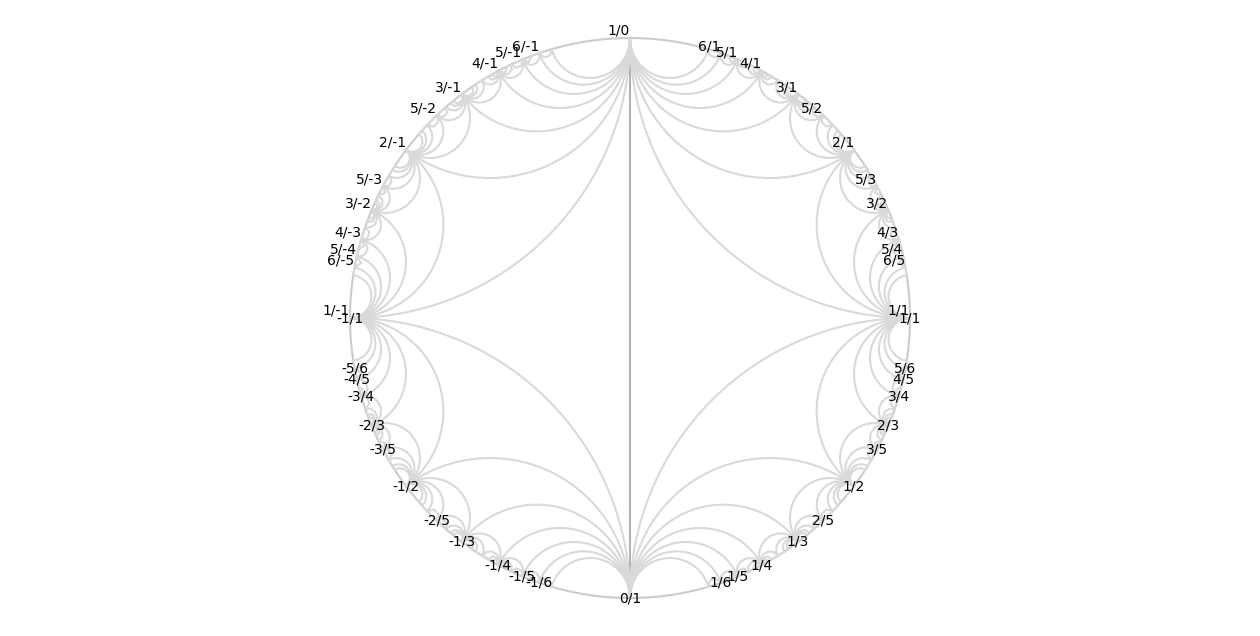

In [116]:
def farey(n):
    # start with a seed to do subdivisions on
    # this one is slightly modded
    F_n = np.array([[-1,1],[0,1], [1,1]],dtype=int)
    for k in range(n):
        tmp = np.zeros((2*F_n.shape[0]-1, 2),dtype=int)
        # copy F_n in 
        tmp[::2,] = F_n
        # add medians in
        tmp[1::2,] = F_n[:-1] + F_n[1:]
        F_n = tmp
    return F_n

def cayley(z):
    ''' map the upper half plane to the unit disk'''
    return 1J*(z-1J)/(z+1J)

def seg2circ(a,b):
    '''a,b points on the unit circle
    return the center, radius and angle
    for the Poincaré geodesic from a to b
    '''
    y = abs(a-b)/2
    dd = 1/np.sqrt(1 - y**2)
    r = y*dd
    return dd*(a+b)/abs(a+b), r, np.arccos(y)

# housekeeping
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.axis('equal')
ax.axis('off')

# draw the unit circle and a diameter
T = np.linspace(0,2*np.pi , 200)
C = np.exp(1J*T)
ax.plot(C.real,C.imag,'.8')
ax.plot([0,0], [1,-1],'.7')

QQ = farey(6)
W = np.array([x[0]/x[1] for x in QQ])
Z = cayley(W)

while len(Z) > 2:
    for a, b in zip(Z, Z[1:]):
        delta = abs(a - b)
        # don't display small arcs
        if  delta < .01 : continue
        cc, r, theta = seg2circ(a, b)
        T = np.linspace(-theta, theta, int(100*delta))
        arc = -r*np.exp(1J*T)*(cc/abs(cc)) + cc
        ax.plot( arc.real, arc.imag,'0.85')
        arc = -arc
        ax.plot(arc.real, arc.imag,'0.85')   

    Z = Z[::2]

for q in QQ:
    numerator, denominator = q
    # no big denominators
    if denominator > 6: continue
    # fractions on the lower half of the circle first
    z = cayley(numerator/denominator)
    cx, cy = z.real, z.imag
    ax.annotate(f"{numerator}/{denominator}",
                xy=(cx, cy), 
                xytext=(0,0),
                textcoords='offset points', ha='center', va='center',
                )
    #numerator can be negative but not the denominator by convention   
    if denominator < 0: q = -q
    denominator, numerator = q
    ax.annotate(f"{numerator}/{denominator}",
                xy=(cx, -cy), 
                xytext=(0,0),
                textcoords='offset points', ha='right', va='bottom',
                )

plt.savefig('farey_diagram.png')
plt.savefig('farey_diagram.svg')

In [26]:
pwd

'/home/macbuse/FAREY_DIAGRAM'

In [110]:
! ./.g

[main 3a200e9] misc
 2 files changed, 454 insertions(+), 452 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.75 KiB | 402.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/FAREY_DIAGRAM.git
   bb3d5bb..3a200e9  main -> main


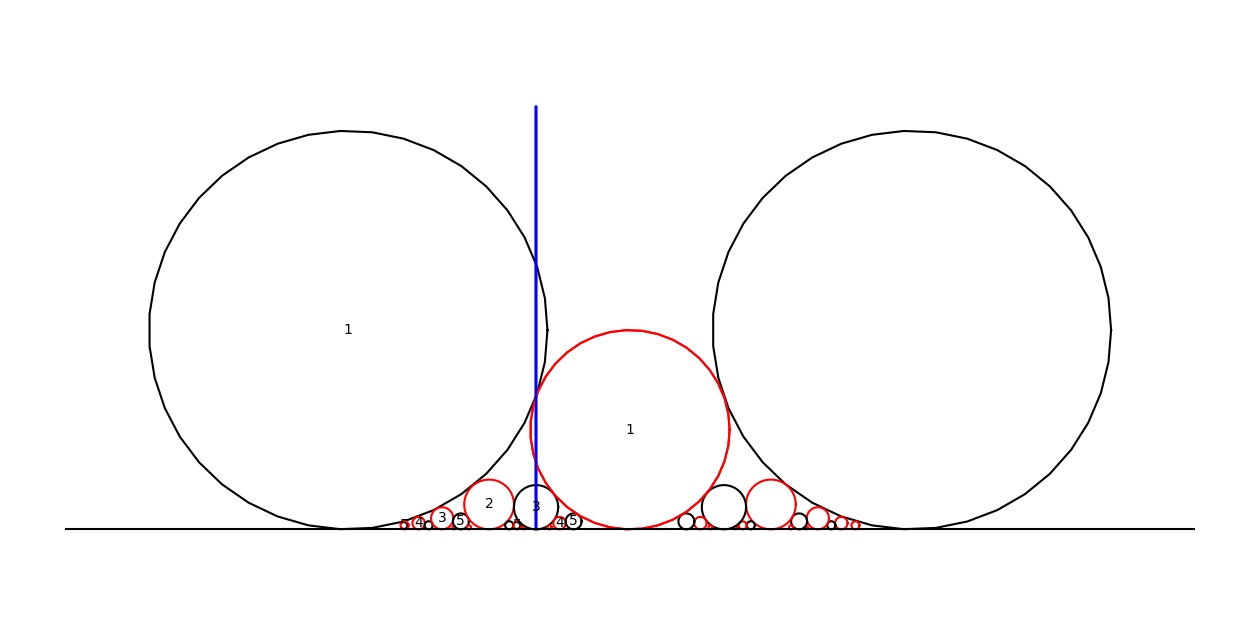

In [66]:
def Farey(n):
    F_n = np.array([[0,1], [1,1]])
    for k in range(n):
        tmp = np.zeros((2*F_n.shape[0]-1, 2))
        # copy F_n in 
        tmp[::2,] = F_n
        # add medians in
        tmp[1::2,] = F_n[:-1] + F_n[1:]
        F_n = tmp
    return F_n

QQ = Farey(4)

fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.axis('equal')
ax.axis('off')

T = np.linspace(0,2*np.pi, 40)
motif = np.exp(1J*T)/2
SCALE = 200
data = []
for vv in QQ[:]:
    col = 'k'
    stroke = "#000000"
    r = np.sqrt(2)/vv[1]**2
    if vv[0] % 2 == 1 : 
        r /= 2
        col = 'r'
        stroke = "#FF0000"
    mm  = r*motif 
    cx = vv[0]/vv[1]
    cy = .5*r

    plt.plot(mm.real + cx, 
             mm.imag + cy ,col);

    if vv[1] < 6:
        ax.annotate(
            str(int(vv[1])),
            xy=(cx, cy), 
            xytext=(3, -5),
            textcoords='offset points', ha='right', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )
    
    plt.plot(mm.real + 2 -  vv[0]/vv[1], 
             mm.imag + .5*r,col);

    plt.plot([2/3]*2,[0,1.5],'b')

   
    r *= SCALE/2
    cx = SCALE*cx + 2*SCALE
    cy *= SCALE

    gg = f'<circle cx="{cx:.2f}" cy="{cy:.2f}" r="{r:.2f}" fill ="none" stroke = "{stroke}"/>'
    data.append(gg)
    cx = 4*SCALE - cx
    data.append(gg)
    
plt.plot([-1,3],[0,0],'k');
plt.savefig('farey_mod.png')

ss = '''<svg viewBox="0 0 1000 1000" xmlns="http://www.w3.org/2000/svg">
  {}
</svg>'''.format('\n'.join(data))
with open('pp.svg','w') as fp:
    fp.write(ss)